# IconClass GAN Training Notebook

**Import libraries**

In [26]:
import pandas as pd
from torch.utils.data import DataLoader
from dataset import IconClassDataset
from GAN import WGAN
from utils import show_tensor_images

**Load labels**

In [27]:
df = pd.read_csv('data/images_attributes_2.csv', index_col=0)

In [28]:
df.index

Index(['landscape', 'mythology', 'historiated initial', 'portrait historié',
       'printed matter', 'emblem', 'veduta frontale', 'initial',
       'ideal landscape', 'human figure', 'left (opposite to right)',
       'right (opposite to left)', 'pictorial chart', 'classical antiquity'],
      dtype='object')

**Choose training label and id**

In [35]:
resume_training = True
attribute_to_train = 'initial'
train_number = 1
gan_id = f"{attribute_to_train}_train_{train_number}"

In [36]:
initial_ids = df.loc[attribute_to_train].dropna().to_list()

In [37]:
greyscale = True
n_feature = 64
dset = IconClassDataset(initial_ids, greyscale, resize=[n_feature, n_feature])
dloader = DataLoader(dset, batch_size=16, shuffle=True, num_workers=0)

In [38]:
len(dloader)

200

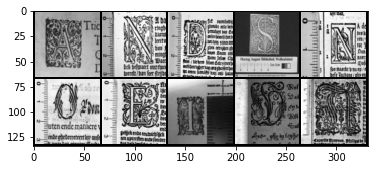

In [39]:
show_tensor_images(next(iter(dloader))[0])

**GAN Component**

In [40]:
betas = (.9, .999)
n_channel = 3
if greyscale:
    n_channel = 1
    
params = {'gen': {'n_feature': n_feature,
                  'n_channel': n_channel, 
                  'lr': 1e-4,
                  'betas': betas},
          'critic': {'n_channel': n_channel,
                     'n_feature': n_feature,
                     'lr': 1e-4,
                     'betas': betas},
          'z_dim': 50,
          'gradient_penalty_factor': 2,
          'stability_noise_std': 5e-2
         }

In [44]:
gan = WGAN(params)
if resume_training:
    gan.load_model(f'data/models/{gan_id}.pth')

In [45]:
gan.init_tensorboard(main_dir='runs', subdir=gan_id, port=8008)

In [46]:
gan.train(n_epoch=200, dataloader=dloader, n_critic_update=1, n_generator_update=1, gan_id=gan_id)

  9%|▉         | 18/200 [03:16<33:12, 10.95s/it]

KeyboardInterrupt: 

In [19]:
gan.step

110000